In [7]:
#Generated By CHATGPT

dataset = [
    {'Fruit': 'Apple', 'Weight': 120, 'Color': (255, 0, 0), 'Sweetness': 0.8},
    {'Fruit': 'Banana', 'Weight': 150, 'Color': (255, 255, 0), 'Sweetness': 0.9},
    {'Fruit': 'Orange', 'Weight': 200, 'Color': (255, 165, 0), 'Sweetness': 0.7},
    {'Fruit': 'Grape', 'Weight': 5, 'Color': (128, 0, 128), 'Sweetness': 0.95},
    {'Fruit': 'Pineapple', 'Weight': 1000, 'Color': (255, 255, 0), 'Sweetness': 0.6},
    {'Fruit': 'Kiwi', 'Weight': 80, 'Color': (0, 128, 0), 'Sweetness': 0.85},
    {'Fruit': 'Mango', 'Weight': 300, 'Color': (255, 165, 0), 'Sweetness': 0.75},
    {'Fruit': 'Cherry', 'Weight': 3, 'Color': (255, 0, 0), 'Sweetness': 0.98},
    {'Fruit': 'Lemon', 'Weight': 50, 'Color': (255, 255, 0), 'Sweetness': 0.6},
    {'Fruit': 'Peach', 'Weight': 200, 'Color': (255, 192, 203), 'Sweetness': 0.8},
    {'Fruit': 'Pear', 'Weight': 170, 'Color': (255, 255, 224), 'Sweetness': 0.75},
    {'Fruit': 'Watermelon', 'Weight': 5000, 'Color': (0, 255, 0), 'Sweetness': 0.5},
    {'Fruit': 'Papaya', 'Weight': 700, 'Color': (255, 140, 0), 'Sweetness': 0.65},
    {'Fruit': 'Plum', 'Weight': 50, 'Color': (221, 160, 221), 'Sweetness': 0.9},
    {'Fruit': 'Blueberry', 'Weight': 1, 'Color': (0, 0, 255), 'Sweetness': 0.85},
    {'Fruit': 'Raspberry', 'Weight': 2, 'Color': (255, 0, 255), 'Sweetness': 0.95},
    {'Fruit': 'Strawberry', 'Weight': 15, 'Color': (255, 0, 0), 'Sweetness': 0.9},
    {'Fruit': 'Blackberry', 'Weight': 5, 'Color': (0, 0, 0), 'Sweetness': 0.92},
    {'Fruit': 'Cantaloupe', 'Weight': 1200, 'Color': (255, 165, 0), 'Sweetness': 0.7},
    {'Fruit': 'Grapefruit', 'Weight': 300, 'Color': (255, 0, 0), 'Sweetness': 0.65},
]

import csv

with open("fruits.csv",'w') as csvfile:
    header = ['Fruit', 'Weight', 'Color', 'Sweetness']
    csvwriter = csv.DictWriter(csvfile,header,delimiter = '.')
#create the headers.
    csvwriter.writeheader()
    for item  in dataset:
        csvwriter.writerow(item)


In [8]:
import pandas as pd
fruits = pd.read_csv("fruits.csv",delimiter='.')
print(fruits)

         Fruit  Weight            Color  Sweetness
0        Apple     120      (255, 0, 0)       0.80
1       Banana     150    (255, 255, 0)       0.90
2       Orange     200    (255, 165, 0)       0.70
3        Grape       5    (128, 0, 128)       0.95
4    Pineapple    1000    (255, 255, 0)       0.60
5         Kiwi      80      (0, 128, 0)       0.85
6        Mango     300    (255, 165, 0)       0.75
7       Cherry       3      (255, 0, 0)       0.98
8        Lemon      50    (255, 255, 0)       0.60
9        Peach     200  (255, 192, 203)       0.80
10        Pear     170  (255, 255, 224)       0.75
11  Watermelon    5000      (0, 255, 0)       0.50
12      Papaya     700    (255, 140, 0)       0.65
13        Plum      50  (221, 160, 221)       0.90
14   Blueberry       1      (0, 0, 255)       0.85
15   Raspberry       2    (255, 0, 255)       0.95
16  Strawberry      15      (255, 0, 0)       0.90
17  Blackberry       5        (0, 0, 0)       0.92
18  Cantaloupe    1200    (255,

C:\Users\Nikitas Kaloger\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


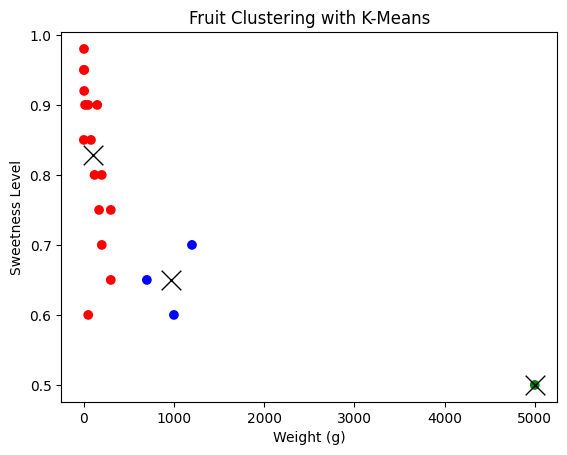

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
X = fruits[['Weight', 'Sweetness']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_

colors = ['red', 'green', 'blue']
fruits['Graph_Color'] = [colors[label] for label in labels]
plt.scatter(fruits['Weight'], fruits['Sweetness'], c=fruits['Graph_Color'])
#print(fruits)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=1, color='black')

# Add labels to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Sweetness Level')
plt.title('Fruit Clustering with K-Means')

# Show the plot
plt.show()

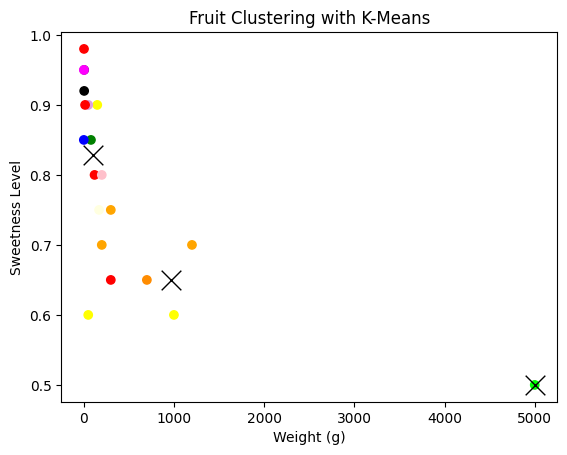

In [10]:
import webcolors

#generate colors from RGB

mapping ={item:webcolors.rgb_to_name(eval(item))  for item in fruits['Color']}
#print(mapping)
colors =[webcolors.rgb_to_name(eval(item), spec ='css3') for item in fruits['Color']]

fruits['Rgb_Color'] = fruits['Color'].map(mapping)
#print(fruits)

labels = kmeans.labels_
#print(labels)
plt.scatter(fruits['Weight'], fruits['Sweetness'], c=fruits['Rgb_Color'])
#print(fruits)



centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=1, color='black')

# Add labels to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Sweetness Level')
plt.title('Fruit Clustering with K-Means')

# Show the plot
plt.show()

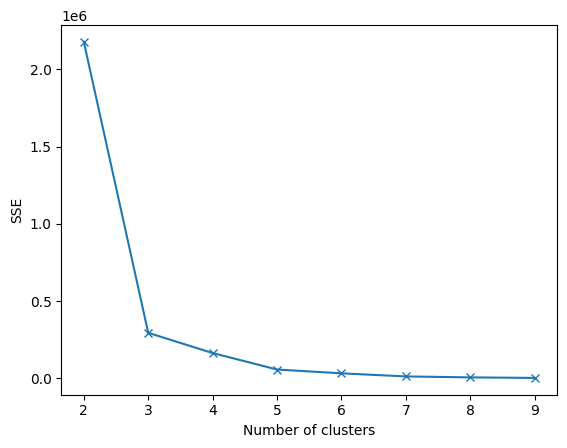

In [11]:
distortion = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    distortion.append(kmeans.inertia_)

plt.plot(range(2, 10), distortion, marker = 'x' )
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


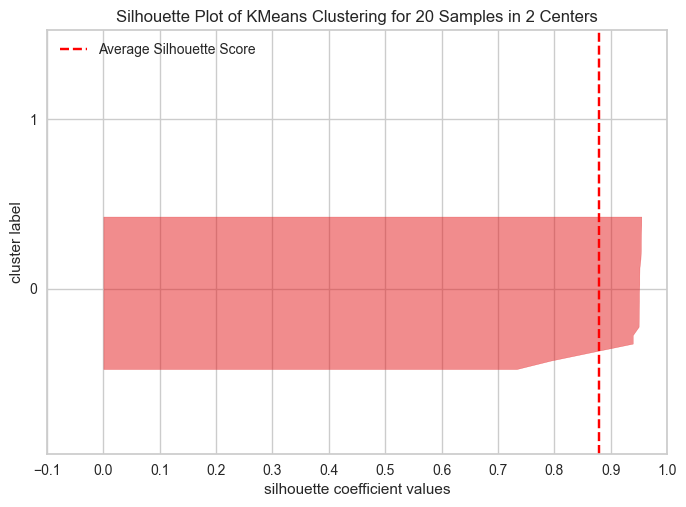

2


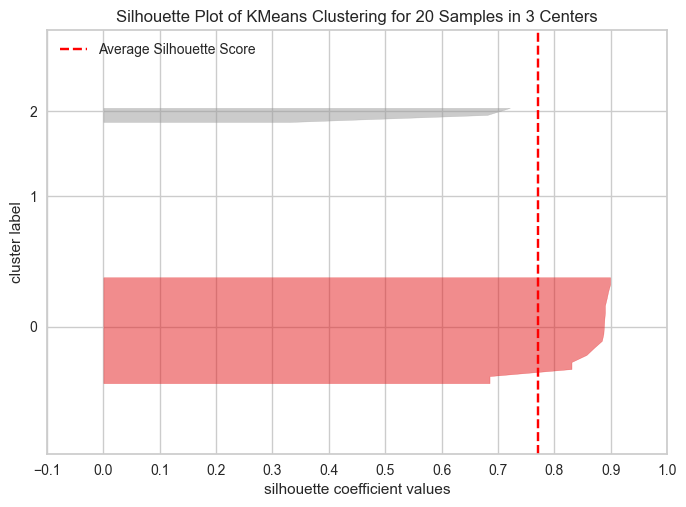

3


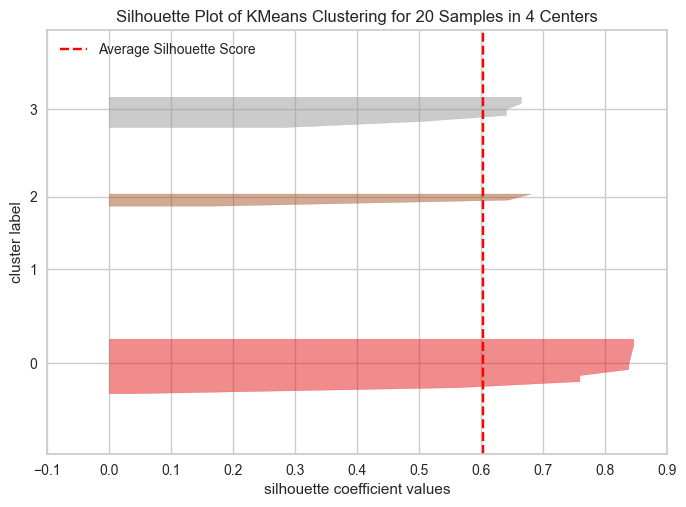

4


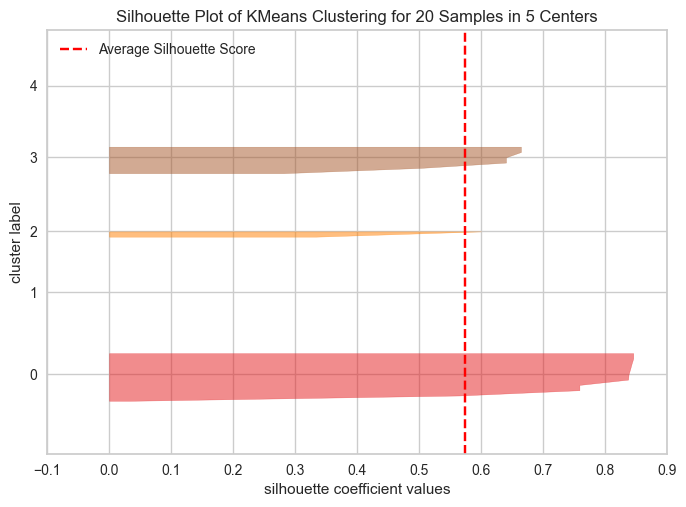

5


In [20]:
from yellowbrick.cluster import  SilhouetteVisualizer
import numpy as np

for k in range(2,6):
    kmeans = KMeans(n_clusters=k,n_init=10)
    sil_vis = SilhouetteVisualizer(kmeans)
    sil_vis.fit(X)
    sil_vis.show()
    test = KMeans(n_clusters=k,n_init=10)
    test.fit(X)
    print(len(set(test.labels_)))

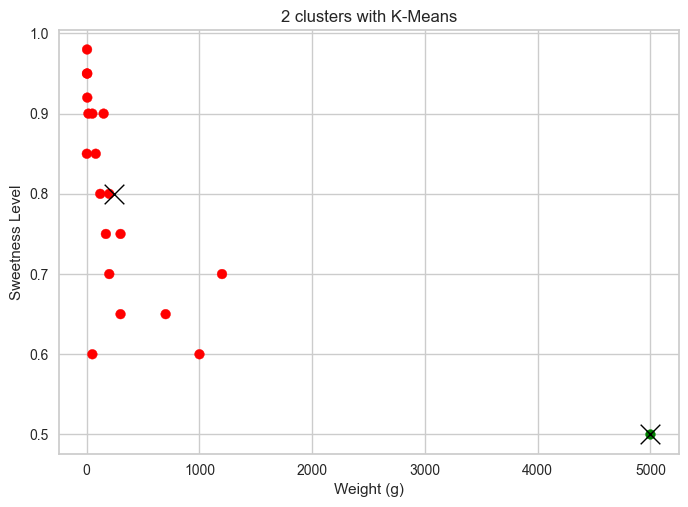

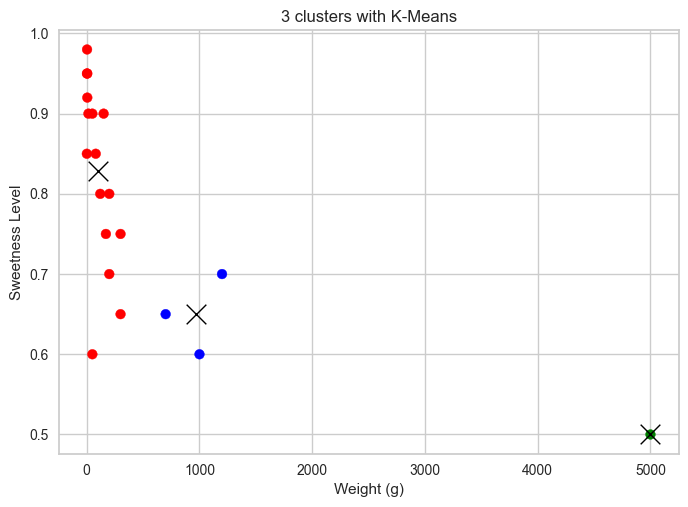

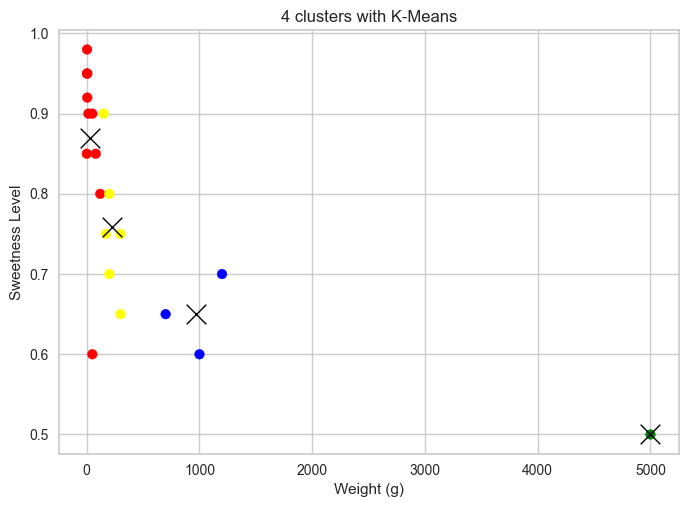

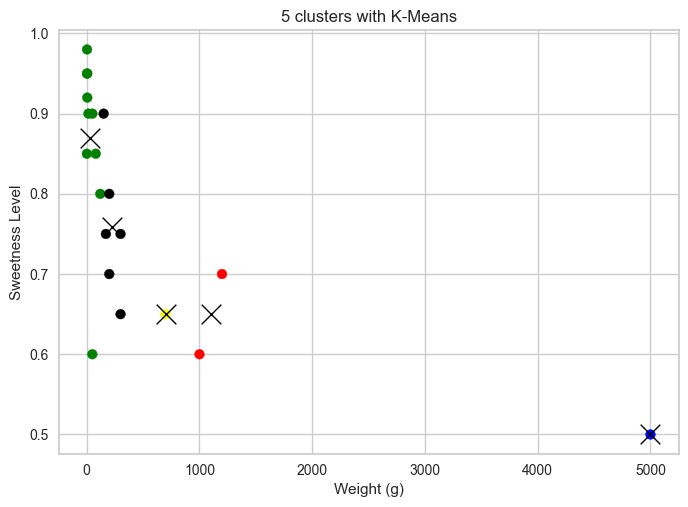

In [22]:
for k in range(2,6):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)

    labels = kmeans.labels_

    colors = ['red', 'green', 'blue','yellow','black','magenda']
    fruits['Graph_Color'] = [colors[label] for label in labels]
    plt.scatter(fruits['Weight'], fruits['Sweetness'], c=fruits['Graph_Color'])
    #print(fruits)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=1, color='black')

    # Add labels to the plot
    plt.xlabel('Weight (g)')
    plt.ylabel('Sweetness Level')
    plt.title(f'{k} clusters with K-Means')

    # Show the plot
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder #changing to numerical by label encoder
try:
    fruits.drop(['Graph_Color','Color','Fruit'],axis=1,inplace=True)
    #print(fruits)
except KeyError:
    pass

#categorical handling
    #numerical encoding
encoder = LabelEncoder()
fruits['Rgb_Color'] = encoder.fit_transform(fruits['Rgb_Color'].astype('str'))
#print(fruits)
    #one hot encoding
fruits_one_hoted = pd.get_dummies(fruits,columns=['Rgb_Color'])
#print(fruits_one_hoted)

#scaling

scaler = MinMaxScaler()
fruits_scaled = scaler.fit_transform(fruits_one_hoted)
#print(fruits_scaled)




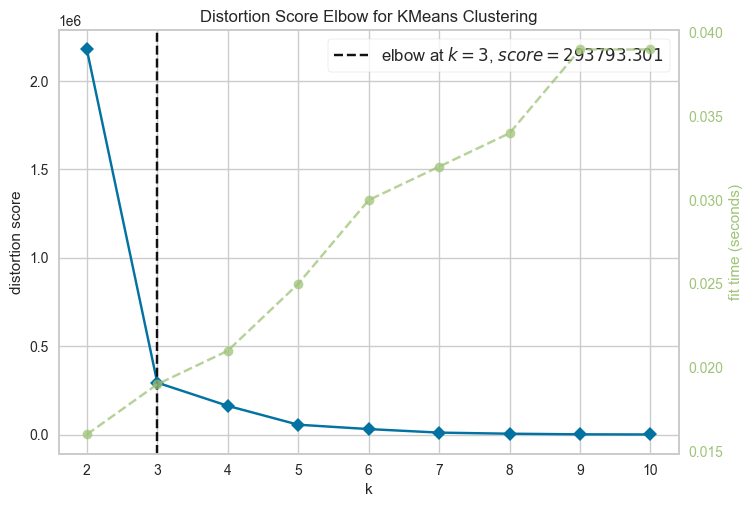

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(n_init=10)
sil_vis = KElbowVisualizer(kmeans)
sil_vis.fit(X)
sil_vis.show()

[[-0.09813171  1.07935532  1.79691013 ... -1.41385106 -0.21558947
  -2.74676011]
 [ 0.42825382  3.53547843  0.54403289 ... -1.63051011 -0.22121628
  -0.6014475 ]
 [ 3.21057775 -2.09642407 -0.37634118 ...  1.70700059 -0.92993349
  -1.15578986]
 ...
 [ 1.68163913 -0.0470243   3.39576044 ...  1.48085527 -0.54715496
   1.2632383 ]
 [-1.12797071 -0.75022695 -1.08181089 ... -1.95735258  1.64401188
  -0.17870398]
 [-1.64207008  1.58283953 -0.64136235 ... -1.83493178  2.06747193
   0.74161463]]


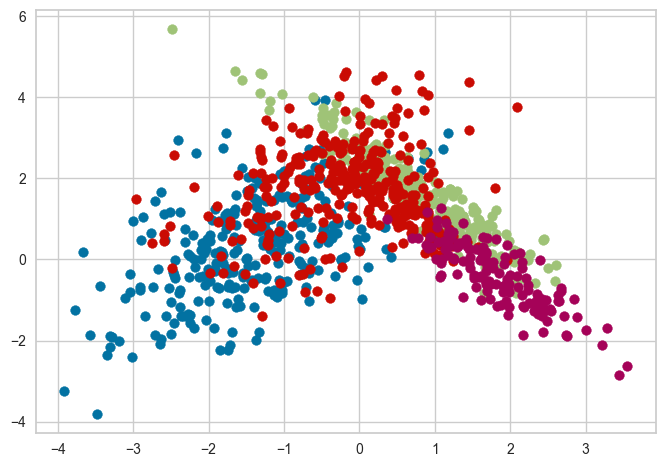

In [15]:
from numpy import unique, where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

train_data, _ = make_classification(n_samples=1000,
                                       n_features=8,
                                       n_informative=5,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)
print(train_data)


agg_mdl = AgglomerativeClustering(n_clusters=4)

# each data point assigned to cluster
agg_result = agg_mdl.fit_predict(train_data)

# Obtain all clusters which are unique
agg_clusters = unique(agg_result)

# plot clusters
for agg_cluster in agg_clusters:
    # fetch data point that fall in this clstr
    index = where(agg_result == agg_cluster)

    plt.scatter(train_data[index, 0], train_data[index, 1])

# Agglomerative hirearchy plot
plt.show()